In [1]:
library(ggplot2)
library(mgcv)
library(visreg)
library(reshape2)
library(ggpubr)
library(ggpattern)
library(plyr)
library(ggsignif)
library(lmerTest)

datax=read.csv('gmdata2.csv')
datax = na.omit(datax)
datax = datax[datax$CBF.GM < 120 ,]
datax = datax[datax$CBF.GM > 5 ,]
datasets = datax

Loading required package: nlme

This is mgcv 1.8-36. For overview type 'help("mgcv-package")'.

Loading required namespace: memoise


Attaching package: ‘plyr’


The following object is masked from ‘package:ggpubr’:

    mutate


Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘lme4’


The following object is masked from ‘package:nlme’:

    lmList



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




[1] 0

[1] 0

[1] 0

Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 3 row

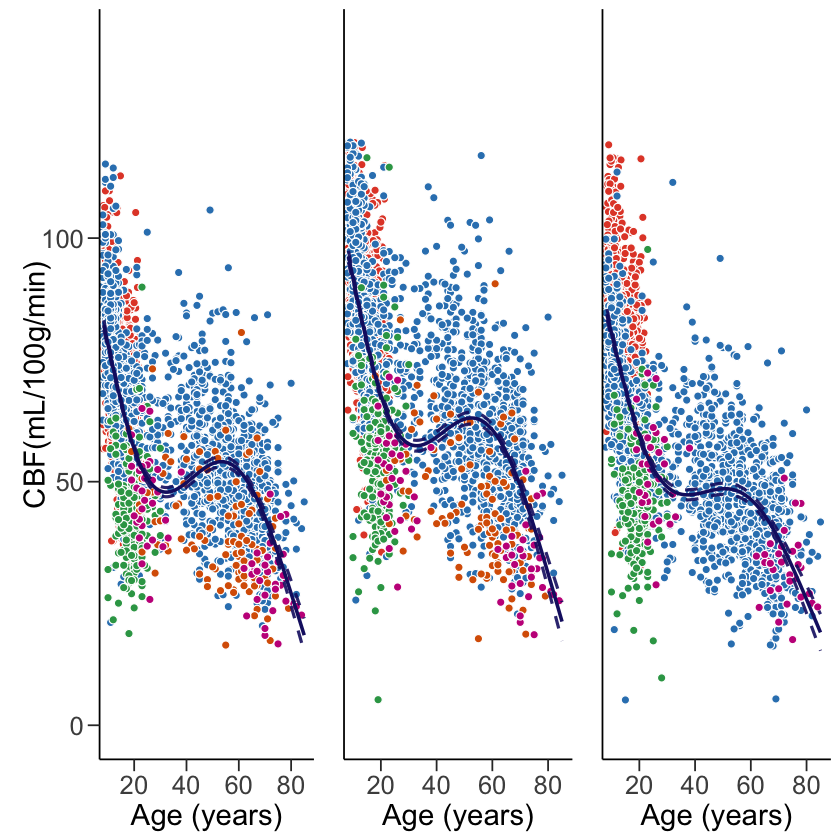

In [2]:
datay = datax[datax$CBFTYPE =='BASIL',]
pnc = datay[datay$Datasets=='PNC',]
nki = datay[datay$Datasets=='NKI',]
age = datay[datay$Datasets=='AGE',]
irr = datay[datay$Datasets=='IRR',]
ftd = datay[datay$Datasets=='FTD',]

#############################################################
basil_Age_gam <- gam(CBF.GM ~ s(AGE, k=4), method="REML", data = datay)

#####################
## Look at results ##
#####################
#summary(cbf_Age_gam)

## Nonlinear age effect
Age_pval <- summary(basil_Age_gam)$s.table[1,4]
Age_pval

####################################
## Visualize Nonlinear Age Effect ##
####################################
plotdata <- visreg(basil_Age_gam,'AGE',type = "conditional",scale = "linear", plot = FALSE)
smooths <- data.frame(Variable = plotdata$meta$x, 
                      x=plotdata$fit[[plotdata$meta$x]], 
                      smooth=plotdata$fit$visregFit, 
                      lower=plotdata$fit$visregLwr, 
                      upper=plotdata$fit$visregUpr)
predicts <- data.frame(Variable = "dim1", 
                       x=plotdata$res$AGE,
                       y=plotdata$res$visregRes)

basil_Age_plot <- ggplot() + xlim(8, 85)+ ylim(0,140) +
  #theme(legend.position = "none")  +
  labs(x = "Age (years)", y = "CBF(mL/100g/min)") +
  theme(axis.title.x = element_text(size = rel(1.6))) +
  theme(axis.title.y = element_text(size = rel(1.6),vjust=-1.2)) + 
  theme(axis.text = element_text(size = rel(1.4))) + theme(axis.line = element_line(colour = 'black', size = .5), axis.ticks.length = unit(.25, "cm")) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank()) +
  geom_point(data = predicts, aes(x, y), colour = "darksalmon", alpha=0.7 ) +  
  #geom_point(data=datay,aes(x=AGE, y=CBF.GM),size=1)+ 
  geom_point(data=pnc,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill='#e34a33', color="white")+ 
  geom_point(data=nki,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#3182bd", color="white")+ 
  geom_point(data=irr,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#31a354", color="white")+ 
  geom_point(data=ftd,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#d95f02", color="white")+ 
  geom_point(data=age,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#c51b8a", color="white")+ 
  geom_line(data = smooths, aes(x = x, y = smooth), colour = "midnightblue",size=1) +
  geom_line(data = smooths, aes(x = x, y=lower), linetype="dashed", colour = "midnightblue", alpha = 0.9, size = 0.9) + 
  geom_line(data = smooths, aes(x = x, y=upper), linetype="dashed",colour = "midnightblue", alpha = 0.9, size = 0.9) +
  coord_cartesian(xlim = c(10.5,85), ylim = c(0,140))
  




datay = datax[datax$CBFTYPE =='PVC',]
pnc = datay[datay$Datasets=='PNC',]
nki = datay[datay$Datasets=='NKI',]
age = datay[datay$Datasets=='AGE',]
irr = datay[datay$Datasets=='IRR',]
ftd = datay[datay$Datasets=='FTD',]

#############################################################
pvc_Age_gam <- gam(CBF.GM ~ s(AGE, k=4), method="REML", data = datay)

#####################
## Look at results ##
#####################
#summary(cbf_Age_gam)

## Nonlinear age effect
Age_pval <- summary(pvc_Age_gam)$s.table[1,4]
Age_pval

####################################
## Visualize Nonlinear Age Effect ##
####################################
plotdata <- visreg(pvc_Age_gam,'AGE',type = "conditional",scale = "linear", plot = FALSE)
smooths <- data.frame(Variable = plotdata$meta$x, 
                      x=plotdata$fit[[plotdata$meta$x]], 
                      smooth=plotdata$fit$visregFit, 
                      lower=plotdata$fit$visregLwr, 
                      upper=plotdata$fit$visregUpr)
predicts <- data.frame(Variable = "dim1", 
                       x=plotdata$res$AGE,
                       y=plotdata$res$visregRes)

pvc_Age_plot <- ggplot() + xlim(8, 85)+ ylim(0,140) +
  #theme(legend.position = "none")  +
  labs(x = "Age (years)", y = "CBF(mL/100 g/min)") +
  theme(axis.title.x = element_text(size = rel(1.6))) +
  theme(axis.title.y = element_text(size = rel(1.6))) + 
  theme(axis.text = element_text(size = rel(1.4))) + theme(axis.line = element_line(colour = 'black', size = .5), axis.ticks.length = unit(.25, "cm")) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank()) +
  geom_point(data = predicts, aes(x, y), colour = "darksalmon", alpha=0.7 ) +  
  #geom_point(data=datay,aes(x=AGE, y=CBF.GM),size=1)+ 
  geom_point(data=pnc,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill='#e34a33', color="white")+ 
  geom_point(data=nki,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#3182bd", color="white")+ 
  geom_point(data=irr,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#31a354", color="white")+ 
  geom_point(data=ftd,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#d95f02", color="white")+ 
  geom_point(data=age,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#c51b8a", color="white")+ 
  geom_line(data = smooths, aes(x = x, y = smooth), colour = "midnightblue",size=1) +
  geom_line(data = smooths, aes(x = x, y=lower), linetype="dashed", colour = "midnightblue", alpha = 0.9, size = 0.9) + 
  geom_line(data = smooths, aes(x = x, y=upper), linetype="dashed",colour = "midnightblue", alpha = 0.9, size = 0.9) +
  coord_cartesian(xlim = c(10.5,85), ylim = c(0,140)) +
   theme(axis.title.y = element_blank(),axis.ticks.y = element_blank(),axis.text.y = element_blank())


datay = datax[datax$CBFTYPE =='SCRUB',]
pnc = datay[datay$Datasets=='PNC',]
nki = datay[datay$Datasets=='NKI',]
age = datay[datay$Datasets=='AGE',]
irr = datay[datay$Datasets=='IRR',]
ftd = datay[datay$Datasets=='FTD',]

#############################################################
scrub_Age_gam <- gam(CBF.GM ~ s(AGE, k=4), method="REML", data = datay)

#####################
## Look at results ##
#####################
#summary(cbf_Age_gam)

## Nonlinear age effect
Age_pval <- summary(scrub_Age_gam)$s.table[1,4]
Age_pval

####################################
## Visualize Nonlinear Age Effect ##
####################################
plotdata <- visreg(scrub_Age_gam,'AGE',type = "conditional",scale = "linear", plot = FALSE)
smooths <- data.frame(Variable = plotdata$meta$x, 
                      x=plotdata$fit[[plotdata$meta$x]], 
                      smooth=plotdata$fit$visregFit, 
                      lower=plotdata$fit$visregLwr, 
                      upper=plotdata$fit$visregUpr)
predicts <- data.frame(Variable = "dim1", 
                       x=plotdata$res$AGE,
                       y=plotdata$res$visregRes)

scrub_Age_plot <- ggplot() + xlim(8, 85)+ ylim(0,140) +
  #theme(legend.position = "none")  +
  labs(x = "Age (years)", y = "CBF(mL/100 g/min)") +
  theme(axis.title.x = element_text(size = rel(1.6))) +
  theme(axis.title.y = element_text(size = rel(1.6))) + 
  theme(axis.text = element_text(size = rel(1.4))) + theme(axis.line = element_line(colour = 'black', size = .5), axis.ticks.length = unit(.25, "cm")) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank()) +
  geom_point(data = predicts, aes(x, y), colour = "darksalmon", alpha=0.7 ) +  
  #geom_point(data=datay,aes(x=AGE, y=CBF.GM),size=1)+ 
  geom_point(data=pnc,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill='#e34a33', color="white")+ 
  geom_point(data=nki,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#3182bd", color="white")+ 
  geom_point(data=irr,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#31a354", color="white")+ 
  #geom_point(data=ftd,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#d95f02", color="white")+ 
  geom_point(data=age,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#c51b8a", color="white")+ 
  geom_line(data = smooths, aes(x = x, y = smooth), colour = "midnightblue",size=1) +
  geom_line(data = smooths, aes(x = x, y=lower), linetype="dashed", colour = "midnightblue", alpha = 0.9, size = 0.9) + 
  geom_line(data = smooths, aes(x = x, y=upper), linetype="dashed",colour = "midnightblue", alpha = 0.9, size = 0.9) +
  coord_cartesian(xlim = c(10.5,85), ylim = c(0,140)) +
theme(axis.title.y = element_blank(),axis.ticks.y = element_blank(),axis.text.y = element_blank())


figure <- ggarrange(basil_Age_plot,pvc_Age_plot,scrub_Age_plot,
                    ncol = 3, nrow = 1,widths=c(2.5,2,2) )
ggsave("Sup_Figure5.pdf", width=10, units="in", height=4,dpi=800)
figure